# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)

import sys
from data_wrangling import specific_utils, process_monkey_information
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization import plot_behaviors_utils
from non_behavioral_analysis.neural_data_analysis.get_neural_data import neural_data_processing
from non_behavioral_analysis.neural_data_analysis.visualize_neural_data import plot_neural_data, plot_modeling_result
from non_behavioral_analysis.neural_data_analysis.model_neural_data import cca_class, pgam_class, neural_data_modeling, reduce_multicollinearity
from non_behavioral_analysis.neural_data_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from non_behavioral_analysis.neural_data_analysis.planning_neural import planning_neural_class, planning_neural_utils


import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from matplotlib import rc
from os.path import exists
from numpy import random
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from importlib import reload
import neo
import gc

import sys
import os
import numpy as np
import torch
from numpy import pi
from matplotlib import pyplot as plt

import numpy as np
import scipy.linalg as linalg
import scipy.interpolate as interpolate
from scipy.signal import fftconvolve


from scipy.io import loadmat
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sys

import scipy.sparse as sparse
import matplotlib.pylab as plt
import subprocess

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods to the path.
done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Retrieve data

In [ ]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"

In [ ]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"

In [3]:
data_item = neural_vs_behavioral_class.NeuralVsBehavioralClass(raw_data_folder_path=raw_data_folder_path)
data_item.streamline_preparing_neural_and_behavioral_data()

Retrieved monkey data from  all_monkey_data/processed_data/monkey_Schro/data_0416/monkey_information.csv  and ff data from  all_monkey_data/processed_data/monkey_Schro/data_0416/ff_basic_info.npz
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from  all_monkey_data/processed_data/monkey_Schro/data_0416/ff_dataframe.h5
When take out monkey subset for GUAT, 139 clusters out of 241 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 470
Retrieved all_trial_patterns
Retrieved pattern_frequencies
Retrieved all_trial_features
Retrieved feature_statistics
Retrieved scatter_around_target_df


# Explore neural data

## prepare x_var

In [6]:
x_var = data_item.binned_spikes_matrix.copy()

## Convolve

In [7]:
x_var_convolved = neural_data_processing.convolve_neural_data(x_var, kernel_len=7)

## Lag

In [328]:
data_item._get_x_and_y_var_lags()
data_item.y_var_lags

,bin_0,num_alive_ff_0,num_visible_ff_0,min_ff_distance_0,min_abs_ff_angle_0,min_visible_ff_distance_0,min_abs_visible_ff_angle_0,catching_ff_0,any_ff_visible_0,LDy_0,...,give_up_after_trying_indice_dummy_3,ignore_sudden_flas_indice_dummy_3,two_in_a_row_3,visible_before_last_one_3,disappear_latest_3,ignore_sudden_flash_3,try_a_few_times_3,give_up_after_trying_3,cluster_around_target_3,waste_cluster_around_target_3
0,0.00000,5.00000,5.00000,295.55263,-2.74929,295.55263,-0.56540,0.00000,1.00000,23.39935,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,1.00000,5.00000,3.00000,295.59342,-2.74922,295.80006,-0.56549,0.00000,1.00000,23.39935,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2.00000,5.00000,1.00000,294.82133,-2.74980,294.82133,-0.36578,0.00000,1.00000,24.94720,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,3.00000,5.00000,1.00000,295.38449,-2.74933,295.75687,-0.36451,0.00000,1.00000,29.81171,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
4,4.00000,5.00000,1.00000,295.61266,-2.74912,295.75687,-0.36451,0.00000,0.00000,21.56914,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14393,14393.00000,2.00000,1.00000,10.45901,-3.01395,37.44604,0.30135,0.00000,0.00000,66.63316,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000
14394,14394.00000,2.00000,1.00000,12.59187,-3.05703,37.44604,0.30135,1.00000,0.00000,16.19639,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
14395,14395.00000,2.00000,1.00000,12.59187,-3.05703,37.44604,0.30135,0.00000,0.00000,85.87281,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
14396,14396.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000


In [9]:
synthetic_data = np.concatenate([np.arange(20).reshape(-1,1), np.arange(1, 21).reshape(-1,1)], axis=1)
synthetic_data_lags = neural_data_processing.add_lags_to_each_feature(synthetic_data, lag_numbers)
synthetic_data_lags

array([[ 3.,  4.,  2.,  3.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 4.,  5.,  3.,  4.,  2.,  3.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,
         0.],
       [ 5.,  6.,  4.,  5.,  3.,  4.,  2.,  3.,  1.,  2.,  0.,  1.,  0.,
         0.],
       [ 6.,  7.,  5.,  6.,  4.,  5.,  3.,  4.,  2.,  3.,  1.,  2.,  0.,
         1.],
       [ 7.,  8.,  6.,  7.,  5.,  6.,  4.,  5.,  3.,  4.,  2.,  3.,  1.,
         2.],
       [ 8.,  9.,  7.,  8.,  6.,  7.,  5.,  6.,  4.,  5.,  3.,  4.,  2.,
         3.],
       [ 9., 10.,  8.,  9.,  7.,  8.,  6.,  7.,  5.,  6.,  4.,  5.,  3.,
         4.],
       [10., 11.,  9., 10.,  8.,  9.,  7.,  8.,  6.,  7.,  5.,  6.,  4.,
         5.],
       [11., 12., 10., 11.,  9., 10.,  8.,  9.,  7.,  8.,  6.,  7.,  5.,
         6.],
       [12., 13., 11., 12., 10., 11.,  9., 10.,  8.,  9.,  7.,  8.,  6.,
         7.],
       [13., 14., 12., 13., 11., 12., 10., 11.,  9., 10.,  8.,  9.,  7.,
         8.],
       [14., 15., 13., 14., 12., 13., 11., 

## firing rate

In [10]:
# get convolved windows
all_windows = np.repeat(data_item.bin_width, len(x_var_convolved))
convolved_windows = np.convolve(all_windows, data_item.convolve_pattern, 'same')

# apply convolution to every column in binned_spikes_df
firing_rate_df = data_item.binned_spikes_df.apply(lambda x: np.convolve(x, data_item.convolve_pattern, 'same')/convolved_windows, axis=0)
firing_rate_df

,unit_0,unit_1,unit_2,unit_3,unit_4,unit_5,unit_6,unit_7,unit_8,unit_9,...,unit_77,unit_78,unit_79,unit_80,unit_81,unit_82,unit_83,unit_84,unit_85,bin
0,5.33333,4.00000,1.33333,5.33333,0.00000,0.00000,8.00000,1.33333,0.00000,2.66667,...,0.00000,2.66667,0.00000,0.00000,2.66667,0.00000,0.00000,1.33333,0.00000,4.00000
1,6.00000,4.00000,1.00000,6.00000,0.00000,0.00000,6.00000,1.00000,0.00000,3.00000,...,0.00000,2.00000,0.00000,0.00000,4.00000,0.00000,0.00000,1.00000,0.00000,6.00000
2,5.60000,4.00000,0.80000,7.20000,0.00000,0.00000,6.40000,1.60000,0.00000,2.40000,...,0.00000,1.60000,0.00000,0.00000,4.80000,0.00000,0.00000,3.20000,0.00000,8.00000
3,8.00000,4.00000,0.80000,9.60000,0.00000,0.00000,8.80000,2.40000,0.00000,3.20000,...,0.00000,1.60000,0.00000,0.00000,6.40000,0.00000,0.80000,4.00000,0.00000,12.00000
4,12.00000,4.00000,0.80000,8.00000,0.00000,0.00000,8.00000,2.40000,0.00000,4.80000,...,0.00000,2.40000,0.00000,0.00000,6.40000,0.00000,0.80000,4.00000,0.00000,16.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14393,16.00000,11.20000,12.00000,18.40000,8.80000,4.80000,4.00000,4.80000,8.80000,2.40000,...,2.40000,2.40000,0.80000,0.00000,7.20000,0.00000,5.60000,3.20000,0.80000,57572.00000
14394,17.60000,9.60000,12.80000,20.80000,8.80000,5.60000,1.60000,3.20000,10.40000,4.00000,...,3.20000,0.80000,0.80000,0.00000,4.80000,0.00000,5.60000,5.60000,0.80000,57576.00000
14395,18.40000,10.40000,10.40000,19.20000,5.60000,4.80000,4.80000,4.00000,10.40000,4.00000,...,2.40000,0.00000,0.00000,0.80000,3.20000,0.80000,4.00000,8.00000,0.80000,57580.00000
14396,15.00000,10.00000,9.00000,16.00000,4.00000,5.00000,5.00000,4.00000,10.00000,3.00000,...,1.00000,0.00000,0.00000,1.00000,2.00000,1.00000,3.00000,10.00000,1.00000,57582.00000


## Plot interspike intervals

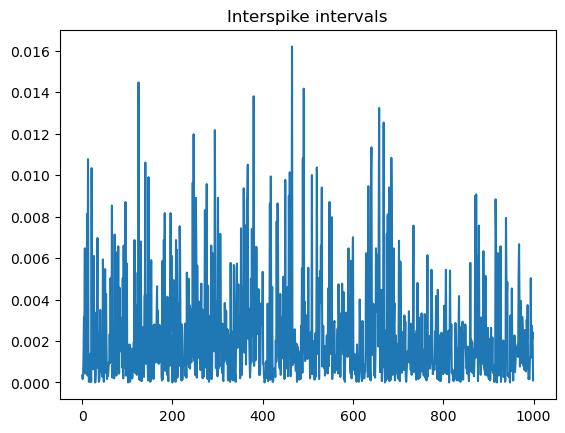

In [11]:
num_spikes = 1000
plt.plot(range(num_spikes), np.diff(data_item.spike_df['time'][:num_spikes+1].values))
plt.title("Interspike intervals")
plt.show()


## Differentiate spikes based on clusters

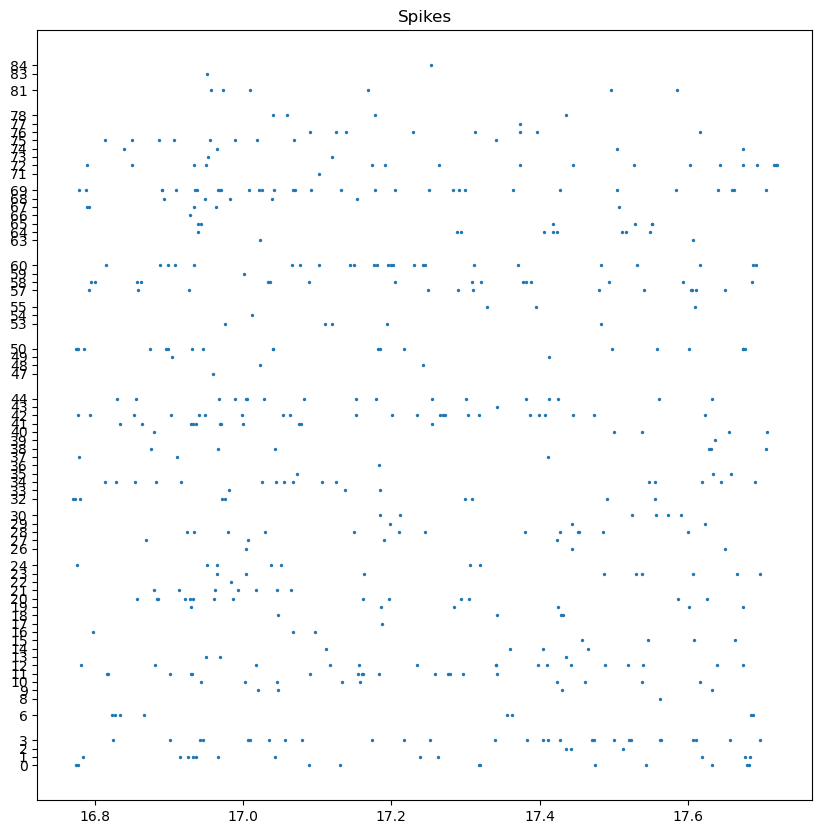

In [12]:
spikes_to_plot = range(10000, 10500)
plt.figure(figsize=(10, 10))
plt.scatter(data_item.spike_df.time[spikes_to_plot], data_item.spike_df.cluster[spikes_to_plot], s=2)
# fix the yticks to be the cluster names
plt.yticks(data_item.spike_df.cluster[spikes_to_plot].unique(), data_item.spike_df.cluster[spikes_to_plot].unique())
plt.title("Spikes")
plt.show()


## Correlation between spike clusters

In [13]:
corr_threshold_to_mark = 0.5
corr_coeff = pd.DataFrame(data_item.all_binned_spikes).corr()
corr_coeff_matrix = corr_coeff.values

# Take out the indices in the correlation matrix of the values that are above the threshold
indices = np.where(np.abs(corr_coeff_matrix) > corr_threshold_to_mark)
high_corr_df = pd.DataFrame({'cluster1': indices[0], 'cluster2': indices[1], 'corr_value': corr_coeff_matrix[indices]})
# delete the rows where cluster1 == cluster2
high_corr_df = high_corr_df[high_corr_df.cluster1 != high_corr_df.cluster2]
high_corr_df.sort_values(by='corr_value', ascending=False, inplace=True)

# also, delete the duplicates
high_corr_df['both_clusters'] = high_corr_df.apply(lambda x: tuple(sorted([x['cluster1'], x['cluster2']])), axis=1)
high_corr_df.drop_duplicates(subset='both_clusters', inplace=True)
high_corr_df.drop(columns='both_clusters', inplace=True)
high_corr_df


,cluster1,cluster2,corr_value
82,53,52,0.75206
65,47,70,0.66887
126,83,71,0.64063
81,53,51,0.62103
3,2,1,0.60938
74,51,52,0.59997
11,6,7,0.58724
14,7,47,0.58219
7,4,31,0.56873
104,69,18,0.55678


In [14]:
# Plot a heatmap if it will not be too large
if corr_coeff.shape[0] < 30:
    plt.figure(figsize = (15, 15))
    sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
    plt.show()

# Relating neural data to other variables

### Catching a target

#### individual instances

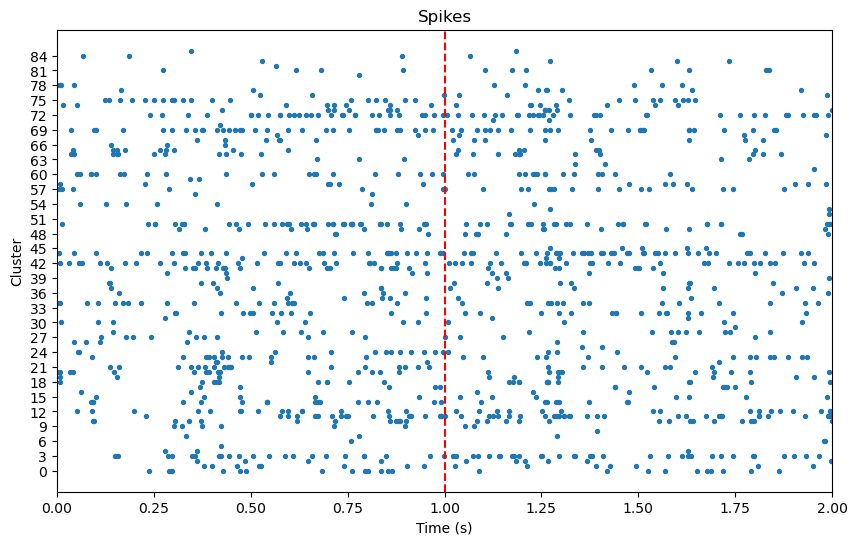

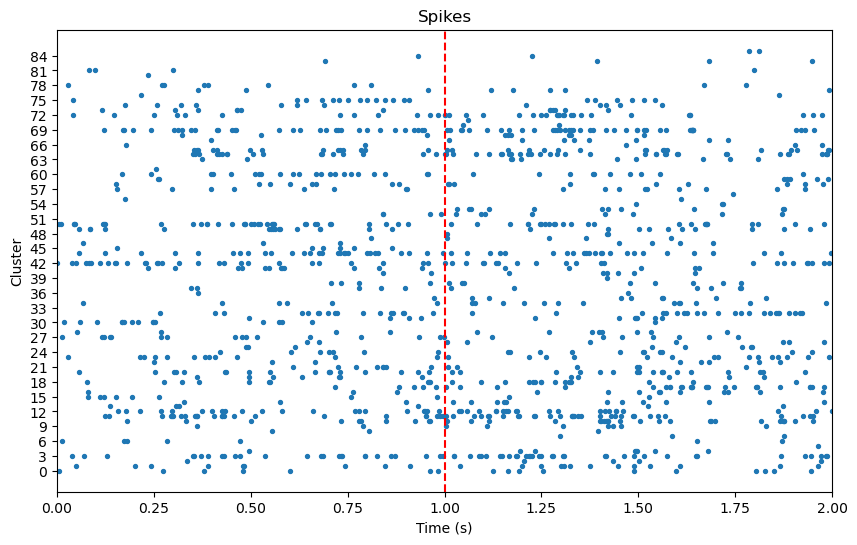

In [15]:
time_to_sample_from = data_item.ff_caught_T_new
plot_neural_data.make_individual_spike_plots(time_to_sample_from, data_item.spike_df, data_item.unique_clusters, 
                                                  max_plots=2)

#### overlaid

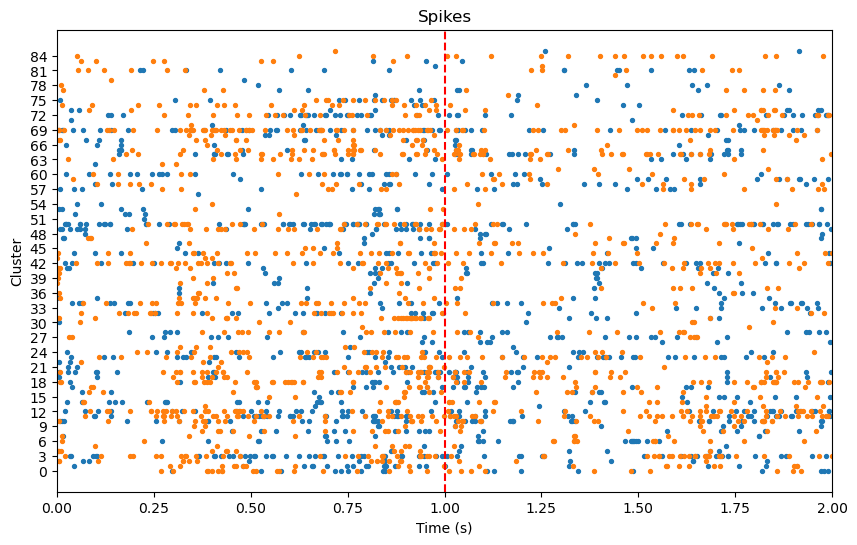

In [16]:
time_to_sample_from = data_item.ff_caught_T_new
plot_neural_data.make_overlaid_spike_plot(time_to_sample_from, data_item.spike_df, data_item.unique_clusters, 
                                               max_rows_to_plot=2)

### Stop (whether or not resulting in a capture?)

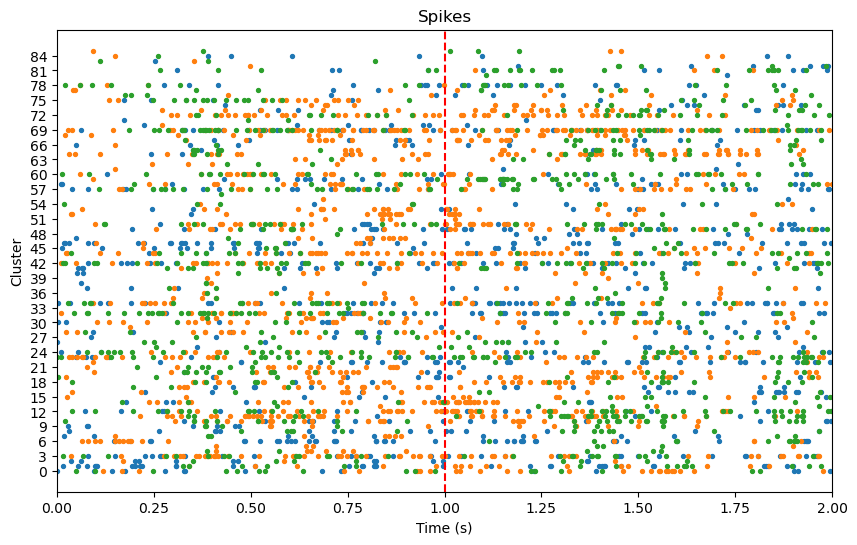

In [17]:
time_to_sample_from = data_item.monkey_information[data_item.monkey_information['monkey_speeddummy'] == 0].time.values
plot_neural_data.make_overlaid_spike_plot(time_to_sample_from, data_item.spike_df, data_item.unique_clusters, 
                                               max_rows_to_plot=3)

### High speed

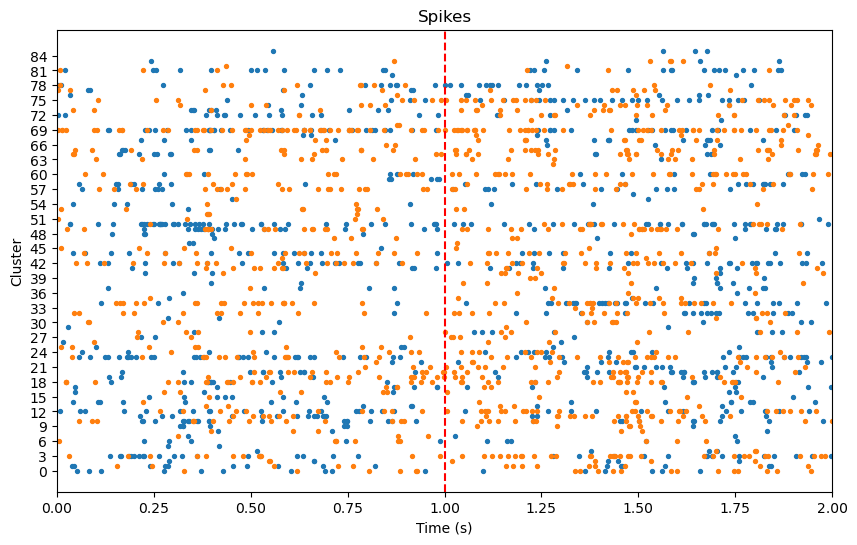

In [18]:
time_to_sample_from = data_item.monkey_information[data_item.monkey_information['monkey_speed'] > 100].time.values
plot_neural_data.make_overlaid_spike_plot(time_to_sample_from, data_item.spike_df, data_item.unique_clusters, 
                                               max_rows_to_plot=2)

### Visible_before_last_one instances

#### individual

In [19]:
current_i = 1

Retrieved target_clust_last_vis_df


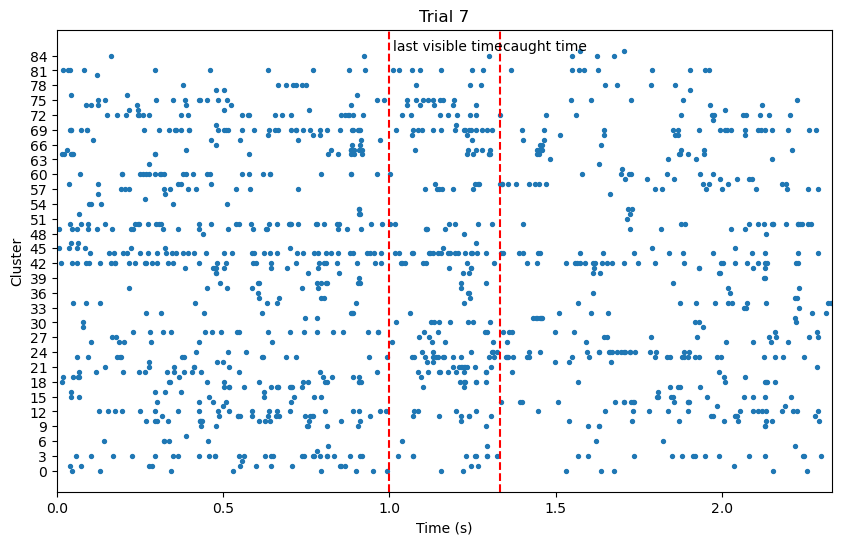

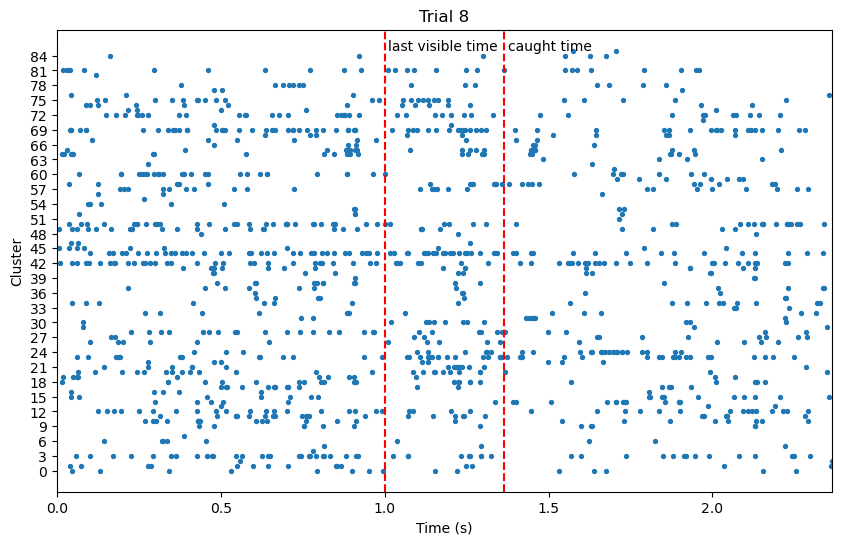

In [20]:
data_item.make_or_retrieve_target_clust_last_vis_df()
max_plots = 2

data_item.target_cluster_VBLO = pattern_by_trials.find_target_cluster_visible_before_last_one(data_item.target_clust_last_vis_df, data_item.ff_caught_T_new)
plot_neural_data.make_individual_spike_plot_from_target_cluster_VBLO(data_item.target_cluster_VBLO, data_item.spike_df, data_item.unique_clusters, starting_row=current_i, max_plots=max_plots)
current_i += max_plots


#### overlaid

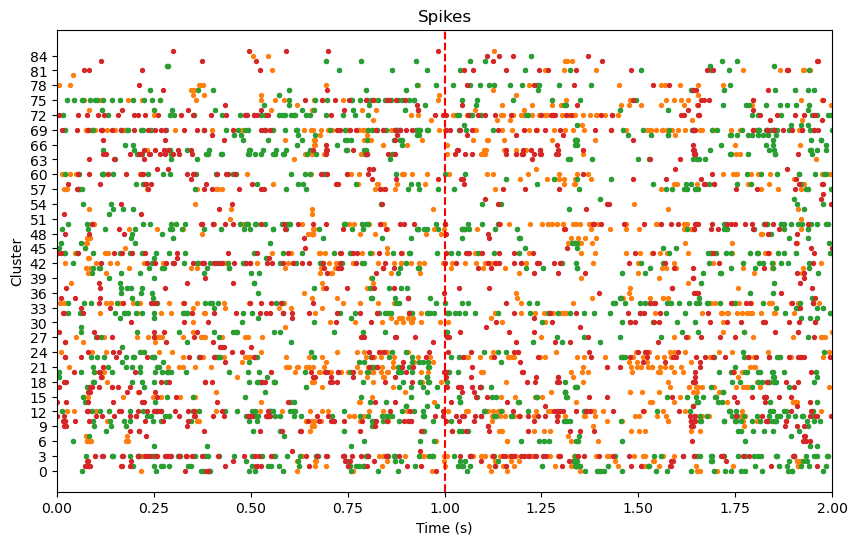

In [21]:
time_to_sample_from = data_item.target_cluster_VBLO['caught_time'].values
plot_neural_data.make_overlaid_spike_plot(time_to_sample_from, data_item.spike_df, data_item.unique_clusters, 
                                               max_rows_to_plot=4)

### Just try it randomly

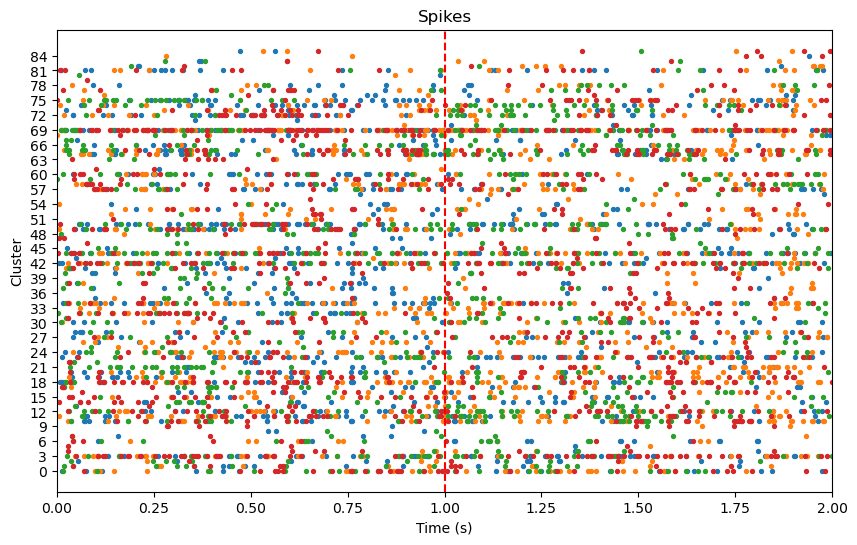

In [22]:
time_to_sample_from = random.uniform(100, 1000, 100)
plot_neural_data.make_overlaid_spike_plot(time_to_sample_from, data_item.spike_df, data_item.unique_clusters, 
                                               max_rows_to_plot=4)

# Appendix

## See other neural data

### plx 
(it's better to use Matlab to get time offset)

In [155]:
exists('/Volumes/Elements/multiff/Bruno/U-probe/7a/Mar 30 2018/neural data')

True

In [ ]:
import os
import pandas as pd
import neo

# Define file paths and file name
original_file_path = '/Volumes/Elements/multiff/Bruno/U-probe/7a/Mar 30 2018/neural data'
new_file_path = '/Users/dusiyi/Downloads/neural_data_temp_folder/'
file_name = 'm51s022_ead'
fname = os.path.join(original_file_path, file_name + '.plx')

# Function to read event timestamps from a .plx file
def plx_event_ts_modified(filename, ch):
    reader = neo.io.PlexonIO(filename)
    block = reader.read_block()
    event_channel = block.segments[0].eventarrays[ch-1]  # ch is 1-based, neo is 0-based
    ts = event_channel.times.rescale('s').magnitude  # Convert to seconds
    sv = event_channel.labels
    freq = reader.header['signal_channels'][0][2]  # Assuming the frequency is stored here
    return len(ts), ts, sv, freq

# Read the event timestamps
n, ts, sv, freq = plx_event_ts_modified(fname, 257)
ts_s = ts / freq

# Create a DataFrame for aligning data
neural_event_time = pd.DataFrame({'label': sv, 'timestamp': ts, 'time': ts_s})

# Write the DataFrame to a text file
output_file = os.path.join(new_file_path, file_name + '.txt')
neural_event_time.to_csv(output_file, index=False, sep='\t')

# Display the contents of the text file
with open(output_file, 'r') as file:
    print(file.read())

### nev

In [2]:
import neo

In [48]:
ns6_path = '/Users/dusiyi/Documents/Multifirefly-Project/all_monkey_data/neural_data/monkey_Schro/data_0416/Sorted/m53s453.nev'

In [52]:
reader = neo.io.BlackrockIO(filename=ns6_path)
reader.parse_header()

In [53]:
block = reader.read_block()
event_data = block.segments[0].events

In [ ]:
for event in event_data:
    if event.name =='digital_input_port':
        event_df = pd.DataFrame({'time': event.times, 'label': event.labels})
        break

In [135]:
# if label == 1 occurs within the first 10 rows, then save the first 10 rows of event df
if event_df.loc[event_df['label']=='1'].index.min() < 10:
    event_df.iloc[:10].to_csv('event_df.csv')

2

In [132]:
# to get the precise time offset
event_df.loc[event_df['label']=='1', 'time'].iloc[0]

4.848133333333333

### ccf

In [46]:
ccf_path = '/Volumes/Elements/multiff/Schro/Utah Array/MultiFirefly/Apr 02 2018/neural data/m53s412.ccf'

In [47]:
ccf_path

'/Volumes/Elements/multiff/Schro/Utah Array/MultiFirefly/Apr 02 2018/neural data/m53s412.ccf'

In [48]:
file_path = 'path/to/your/file.ccf'

In [49]:
try:
    with open(ccf_path, 'r') as file:
        for line in file:
            print(line.strip())  # Process each line as needed
except FileNotFoundError:
    print(f"The file at {ccf_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

The file at /Volumes/Elements/multiff/Schro/Utah Array/MultiFirefly/Apr 02 2018/neural data/m53s412.ccf was not found.


### other files in sorted data

In [ ]:
# sorted_neural_data_path = os.path.join(raw_data_folder_path, 'neural_data/Sorted')

In [ ]:
sorted_neural_data_path = '/Users/dusiyi/Documents/Multifirefly-Project/all_monkey_data/neural_data/monkey_Schro/data_0416/Sorted'

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "spike_times.npy")
template_feature_ind = np.load(filepath)
print(template_feature_ind.shape)
template_feature_ind

(6403753, 1)


array([[       81],
       [      193],
       [      197],
       ...,
       [312629938],
       [312629953],
       [312629978]], dtype=uint64)

In [ ]:
# See other data
filepath = os.path.join(sorted_neural_data_path, 'cluster_KSLabel.tsv')
cluster_KSLabel=pd.read_csv(filepath,sep='\t')
cluster_KSLabel

,cluster_id,KSLabel
0,0,mua
1,1,mua
2,2,mua
3,3,good
4,4,mua
5,5,mua
6,6,mua
7,7,mua
8,8,mua
9,9,mua


In [ ]:
filepath = os.path.join(sorted_neural_data_path, 'cluster_ContamPct.tsv')
cluster_ContamPct=pd.read_csv(filepath,sep='\t')
cluster_ContamPct

,cluster_id,ContamPct
0,0,55.80000
1,1,108.90000
2,2,257.50000
3,3,4.70000
4,4,221.60000
5,5,162.40000
6,6,263.70000
7,7,166.50000
8,8,96.80000
9,9,146.60000


In [ ]:
filepath = os.path.join(sorted_neural_data_path, 'cluster_Amplitude.tsv')
cluster_Amplitude=pd.read_csv(filepath,sep='\t')
cluster_Amplitude

,cluster_id,Amplitude
0,0,65.60000
1,1,149.40000
2,2,134.60000
3,3,163.00000
4,4,44.90000
5,5,40.20000
6,6,83.30000
7,7,48.00000
8,8,74.20000
9,9,62.90000


In [ ]:
filepath = os.path.join(sorted_neural_data_path, "pc_features.npy")
pc_feature_ind = np.load(filepath)
print("shape:", pc_feature_ind.shape)
pc_feature_ind

shape: (6403753, 3, 32)


array([[[ 20.618639  ,  -2.5252807 ,   1.5668374 , ...,  -4.154465  ,
           1.4744089 ,   1.1350412 ],
        [  7.0396285 ,   0.4470765 ,  -2.3344107 , ...,  -1.1780388 ,
           0.45768088,  -1.2214112 ],
        [  3.8487556 ,   0.26052502,   0.18409123, ...,   2.6717622 ,
          -0.46303403,  -0.18098123]],

       [[ 14.541357  ,  -0.5904142 ,  -1.5710227 , ...,   3.003591  ,
           1.5313034 ,   0.7499817 ],
        [  2.8442085 ,   1.3935217 ,   2.8088834 , ...,  -2.2399478 ,
           2.1148336 ,  -0.2526575 ],
        [  1.0117326 ,  -1.6347591 ,  -2.7756414 , ...,  -1.8736006 ,
          -0.52461785,  -2.2295024 ]],

       [[ 13.217699  ,  -1.5539297 ,  -1.5104129 , ...,  -1.2300999 ,
           2.8117504 ,  -1.3707979 ],
        [ -5.4396086 ,  -3.2783377 ,   1.0339067 , ...,  -0.7085005 ,
          -1.3703368 ,  -2.385148  ],
        [ -1.5712644 ,   2.893554  ,   1.088912  , ...,  -1.0856136 ,
           1.0162007 ,  -1.4661223 ]],

       ...,

       [[

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "pc_feature_ind.npy")
pc_feature_ind = np.load(filepath)
print(pc_feature_ind.shape)
pc_feature_ind

(86, 32)


array([[ 0,  3,  2, ..., 35, 22, 43],
       [ 1,  9,  8, ..., 26, 34, 44],
       [ 1,  9,  8, ..., 26, 34, 44],
       ...,
       [60, 51, 59, ..., 22, 54, 23],
       [27, 21, 28, ..., 46, 47, 30],
       [47, 42, 41, ..., 21, 60, 29]], dtype=uint32)

In [ ]:
pc_feature_ind.sum(axis=1)

array([ 674,  708,  708,  733,  674,  674,  586,  586,  560,  634,  634,
        708,  744,  769,  755,  724,  605,  604,  737,  819,  819,  769,
        738,  775,  783,  852,  893,  796,  868,  883,  890,  857,  940,
        926,  926,  926,  926,  926,  926,  926,  926, 1016, 1000, 1038,
       1058, 1052, 1052,  983, 1077, 1136, 1184, 1214, 1214, 1214, 1290,
       1285, 1285, 1358, 1250, 1185, 1343, 1305, 1285, 1285, 1291, 1291,
       1369, 1369, 1404, 1426, 1414, 1393, 1343,  769,  605,  769,  883,
       1038, 1170, 1170, 1285, 1305, 1285, 1393,  883, 1285], dtype=uint64)

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "channel_map.npy")
channel_map = np.load(filepath)
print(channel_map.shape)
channel_map

(62, 1)


array([[ 0],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [22],
       [23],
       [25],
       [26],
       [27],
       [29],
       [31],
       [33],
       [35],
       [36],
       [37],
       [40],
       [41],
       [43],
       [44],
       [45],
       [47],
       [48],
       [49],
       [51],
       [52],
       [53],
       [54],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [66],
       [71],
       [73],
       [76],
       [78],
       [85],
       [86],
       [87],
       [88],
       [89],
       [90],
       [91],
       [92],
       [93],
       [94],
       [95]], dtype=int32)

In [ ]:
channel_map+1

array([[ 1],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [23],
       [24],
       [26],
       [27],
       [28],
       [30],
       [32],
       [34],
       [36],
       [37],
       [38],
       [41],
       [42],
       [44],
       [45],
       [46],
       [48],
       [49],
       [50],
       [52],
       [53],
       [54],
       [55],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [67],
       [72],
       [74],
       [77],
       [79],
       [86],
       [87],
       [88],
       [89],
       [90],
       [91],
       [92],
       [93],
       [94],
       [95],
       [96]], dtype=int32)

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "channel_positions.npy")
channel_positions = np.load(filepath)
print(channel_positions.shape)
channel_positions

(62, 2)


array([[ 2.,  1.],
       [ 9.,  1.],
       [ 1.,  2.],
       [ 2.,  2.],
       [ 3.,  2.],
       [ 4.,  2.],
       [ 6.,  2.],
       [ 7.,  2.],
       [ 8.,  2.],
       [ 9.,  2.],
       [10.,  2.],
       [ 1.,  3.],
       [ 2.,  3.],
       [ 3.,  3.],
       [ 5.,  3.],
       [ 6.,  3.],
       [ 8.,  3.],
       [ 9.,  3.],
       [10.,  3.],
       [ 2.,  4.],
       [ 4.,  4.],
       [ 6.,  4.],
       [ 8.,  4.],
       [ 9.,  4.],
       [10.,  4.],
       [ 3.,  5.],
       [ 4.,  5.],
       [ 6.,  5.],
       [ 7.,  5.],
       [ 8.,  5.],
       [10.,  5.],
       [ 1.,  6.],
       [ 2.,  6.],
       [ 4.,  6.],
       [ 5.,  6.],
       [ 6.,  6.],
       [ 7.,  6.],
       [ 9.,  6.],
       [10.,  6.],
       [ 1.,  7.],
       [ 2.,  7.],
       [ 3.,  7.],
       [ 4.,  7.],
       [ 5.,  7.],
       [ 6.,  7.],
       [ 7.,  7.],
       [ 9.,  7.],
       [ 4.,  8.],
       [ 6.,  8.],
       [ 9.,  8.],
       [ 1.,  9.],
       [ 8.,  9.],
       [ 9.,

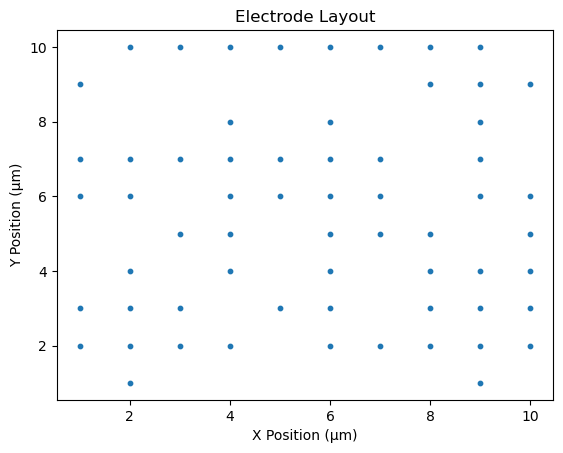

In [ ]:

# Plot
plt.scatter(channel_positions[:, 0], channel_positions[:, 1], s=10)
plt.xlabel('X Position (µm)')
plt.ylabel('Y Position (µm)')
plt.title('Electrode Layout')
plt.show()

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "amplitudes.npy")
amplitudes = np.load(filepath)
print(amplitudes.shape)
amplitudes

(6403753, 1)


array([[21.93619156],
       [16.16333389],
       [15.71184444],
       ...,
       [22.58839989],
       [21.73412895],
       [18.41584015]])

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "whitening_mat.npy")
whitening_mat = np.load(filepath)
print(whitening_mat.shape)
whitening_mat

(62, 62)


array([[ 0.13273552,  0.        , -0.00104353, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.07428131,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00120236,  0.        ,  0.09356938, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.09617517,
        -0.00204935, -0.00198075],
       [ 0.        ,  0.        ,  0.        , ..., -0.00207544,
         0.09710765, -0.00218177],
       [ 0.        ,  0.        ,  0.        , ..., -0.00182645,
        -0.00218138,  0.09744444]])

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "whitening_mat_inv.npy")
whitening_mat_inv = np.load(filepath)
print(whitening_mat_inv.shape)
whitening_mat_inv

(62, 62)


array([[ 7.58645464,  0.01218926,  0.11293022, ...,  0.00322411,
         0.00487055,  0.00221318],
       [ 0.01538645, 13.51109796,  0.01312852, ...,  0.0221599 ,
         0.02016271,  0.00320742],
       [ 0.12600994,  0.00889407, 10.73036749, ..., -0.00115156,
         0.00250366, -0.00245754],
       ...,
       [ 0.00679701,  0.01028763,  0.00697325, ..., 10.4339813 ,
         0.24633471,  0.22446798],
       [ 0.01778544,  0.01886513,  0.01227211, ...,  0.27803402,
        10.35730369,  0.25112532],
       [ 0.00336366,  0.00353059,  0.00192102, ...,  0.21532962,
         0.24846938, 10.27633365]])

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "templates.npy")
templates = np.load(filepath)
print(templates.shape)
templates

(86, 82, 62)


array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.04184048,  0.        , -0.00015936, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.03725861,  0.        ,  0.00033146, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.02903703,  0.        ,  0.00044577, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.01943992,  0.        , ...,  

In [ ]:
for k in range(templates.shape[1]):
    print(k, templates[:,k,:].sum())

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 1.7431003
22 2.4330242
23 2.375722
24 2.3881845
25 2.3333552
26 2.2388947
27 2.0827384
28 1.9103798
29 1.6833671
30 1.4207656
31 1.13311
32 0.79580677
33 0.4061389
34 -0.002726823
35 -0.6147846
36 -1.8749169
37 -4.4645452
38 -9.089349
39 -15.178922
40 -19.817684
41 -20.06224
42 -16.343826
43 -11.418644
44 -7.0442123
45 -3.666309
46 -1.2647007
47 0.26328754
48 1.1512258
49 1.6693156
50 2.0460837
51 2.3599565
52 2.6009731
53 2.7841725
54 2.996193
55 3.1608968
56 3.2255788
57 3.281845
58 3.305112
59 3.3120408
60 3.3130114
61 3.2513025
62 3.194953
63 3.12551
64 3.000095
65 2.8669844
66 2.7253156
67 2.5900748
68 2.418854
69 2.2684844
70 2.124668
71 1.933041
72 1.7360443
73 1.5751898
74 1.4138877
75 1.2019715
76 1.0462636
77 0.92446196
78 0.77618
79 0.6951061
80 0.5428696
81 0.69433546


In [ ]:
filepath = os.path.join(sorted_neural_data_path, "templates_ind.npy")
templates_ind = np.load(filepath)
print(templates_ind.shape)
templates_ind

(86, 62)


array([[ 0.,  1.,  2., ..., 59., 60., 61.],
       [ 0.,  1.,  2., ..., 59., 60., 61.],
       [ 0.,  1.,  2., ..., 59., 60., 61.],
       ...,
       [ 0.,  1.,  2., ..., 59., 60., 61.],
       [ 0.,  1.,  2., ..., 59., 60., 61.],
       [ 0.,  1.,  2., ..., 59., 60., 61.]])

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "template_features.npy")
template_features = np.load(filepath)
print(template_features.shape)
template_features

(6403753, 32)


array([[22.158308  ,  3.4483945 ,  1.4854034 , ...,  0.        ,
         0.        ,  0.        ],
       [16.463593  ,  0.        ,  2.1786954 , ...,  2.2103188 ,
         2.528269  ,  0.        ],
       [16.026339  ,  0.82552624,  0.        , ...,  0.36126056,
         2.6805212 ,  0.        ],
       ...,
       [22.806973  ,  2.0393517 ,  1.8054582 , ...,  0.8326059 ,
         0.        ,  3.9068842 ],
       [21.961761  ,  2.9633918 ,  0.7882936 , ...,  0.12343296,
         0.6473469 ,  1.806896  ],
       [18.684303  ,  1.4732544 ,  0.5551706 , ...,  0.557631  ,
         3.437384  ,  0.        ]], dtype=float32)

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "template_feature_ind.npy")
template_feature_ind = np.load(filepath)
print(template_feature_ind.shape)
template_feature_ind

(86, 32)


array([[ 0, 27, 30, ..., 16, 57, 14],
       [ 1,  2, 31, ..., 28, 84, 29],
       [ 2,  1, 31, ...,  6, 44, 15],
       ...,
       [83, 71, 80, ..., 48, 12, 46],
       [84, 29, 76, ..., 58,  6, 26],
       [85, 56, 80, ..., 36, 53, 37]], dtype=uint32)

In [ ]:
template_feature_ind.sum(axis=1)

array([1041,  924,  972, 1189,  992,  963, 1188, 1185, 1140, 1019, 1059,
       1024,  982, 1192, 1323,  930, 1043, 1022, 1126, 1033, 1187, 1137,
       1254, 1409, 1229, 1234, 1389, 1263, 1310, 1418, 1159, 1218, 1448,
       1229, 1338, 1257, 1393, 1390, 1321, 1324, 1302, 1370, 1492, 1320,
       1540, 1285, 1353, 1347, 1380, 1389, 1570, 1669, 1609, 1684, 1732,
       1644, 1693, 1919, 1672, 1609, 1854, 1757, 1631, 1779, 1764, 1548,
       1714, 1586, 1797, 1941, 1855, 1868, 1926, 1253, 1102, 1232, 1418,
       1385, 1738, 1724, 1693, 1821, 1631, 1880, 1428, 1686], dtype=uint64)

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "similar_templates.npy")
similar_templates = np.load(filepath)
print(similar_templates.shape)

(86, 86)


In [ ]:
similar_templates.T

array([[0.9880713 , 0.00129283, 0.00256783, ..., 0.00015035, 0.00320156,
        0.01164808],
       [0.00129283, 0.9872803 , 0.7584807 , ..., 0.0011205 , 0.00396002,
        0.00113449],
       [0.00256783, 0.7584807 , 0.98814744, ..., 0.0006546 , 0.00241226,
        0.00267359],
       ...,
       [0.00015035, 0.0011205 , 0.0006546 , ..., 0.9876821 , 0.0003777 ,
        0.01901751],
       [0.00320156, 0.00396002, 0.00241226, ..., 0.0003777 , 0.9881588 ,
        0.03884925],
       [0.01164808, 0.00113449, 0.00267359, ..., 0.01901751, 0.03884925,
        0.98817366]], dtype=float32)

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "spike_times.npy")
spike_times = np.load(filepath)
print(spike_times.shape)
spike_times

(6403753, 1)


array([[       81],
       [      193],
       [      197],
       ...,
       [312629938],
       [312629953],
       [312629978]], dtype=uint64)

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "spike_templates.npy")
spike_templates = np.load(filepath)
print(spike_templates.shape)
spike_templates

(6403753, 1)


array([[49],
       [10],
       [12],
       ...,
       [ 3],
       [14],
       [60]], dtype=uint32)

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "spike_clusters.npy")
spike_clusters = np.load(filepath)
print(spike_clusters.shape)
spike_clusters

(6403753,)


array([49, 10, 12, ...,  3, 14, 60], dtype=int32)

: 

In [ ]:
len(np.where((spike_templates == spike_clusters))[0])/len(spike_templates.reshape(-1))
# So the two arrays are exactly the same

In [ ]:
print(spike_clusters.reshape(-1).min(), spike_clusters.reshape(-1).max())

In [ ]:
import h5py

filepath = os.path.join(sorted_neural_data_path, "QualityMetr.mat")
QualityMetr = {}
f = h5py.File(filepath)
for k, v in f.items():
    QualityMetr[k] = np.array(v)
QualityMetr



{'cR': array([[0.21083187, 0.20809339, 0.62784251, 0.00658536, 0.26866637,
         1.        , 0.61339939, 0.67631524, 0.04964964, 0.99986688,
         0.24860907, 0.14502512, 0.03994425, 0.38976867, 0.31653796,
         0.08070661, 0.13142676, 0.43245405, 0.28929476, 0.1198597 ,
         0.03717658, 0.16330564, 0.10301859, 0.02277424, 0.04821653,
         0.02727957, 0.00269035, 0.09299526, 0.02160717, 0.49811426,
         0.05524425, 0.99150273, 0.05165151, 0.03515252, 0.03038455,
         0.93963889, 0.65519134, 0.34697099, 0.77518588, 0.61922733,
         0.43242228, 0.03576648, 0.14432568, 0.40470297, 0.0047173 ,
         0.03042827, 0.04890669, 0.60074074, 0.31185472, 0.26694226,
         0.34568449, 0.17083208, 0.48963443, 0.2449122 , 0.01176535,
         0.03697949, 0.2994532 , 0.04147506, 0.08134491, 0.00066483,
         0.36063322, 0.76147959, 0.14342765, 0.00251907, 0.24306973,
         0.24527471, 0.27350117, 0.13565151, 0.16080133,        nan,
         0.12009288, 0.26627

In [ ]:
filepath = os.path.join(sorted_neural_data_path, "rez.mat")
arrays = {}
f = h5py.File(filepath)
for k, v in f.items():
    arrays[k] = np.array(v)
arrays

{'#refs#': array(['A', 'B', 'C', 'D', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
        'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
        'w', 'x', 'y', 'z'], dtype='<U1'),
 '#subsystem#': array(['MCOS'], dtype='<U4'),
 'rez': array(['Ths', 'U', 'UA', 'U_a', 'U_b', 'W', 'WA', 'W_a', 'W_b', 'Wphy',
        'Wraw', 'Wrot', 'cProj', 'cProjPC', 'ccb', 'ccbsort', 'dWU',
        'est_contam_rate', 'good', 'iList', 'iNeigh', 'iNeighPC', 'iorig',
        'isplit', 'istart', 'mu', 'muA', 'nsp', 'ops', 'simScore', 'st2',
        'st3', 'temp', 'xc', 'xcoords', 'yc', 'ycoords'], dtype='<U15')}

In [ ]:
stop!

## Get mapping tables
(The mapping tables relate the paths on the hard drive to the local paths.)

### Bruno

In [ ]:
monkey_name = 'monkey_Bruno'
hdrive_dir = '/Volumes/Elements/multiff/Bruno/U-probe/7a'
neural_data_folder_name = 'neural data'
filter_neural_file_func = lambda x: [f for f in x if ('plx' in f) & ('ead' not in f)]
bruno_mapping_table = neural_data_processing.get_mapping_table_between_hard_drive_and_local_folders(monkey_name, hdrive_dir, neural_data_folder_name, filter_neural_file_func)


In [ ]:
# This code will work:
os.listdir('/Volumes/Elements/multiff/Bruno/U-probe/7a')

# # The code below will return "Invalid argument," and I'm still not exactly sure hwy
# os.listdir('/Volumes/Elements/multiff/Bruno/U-probe/7a/Mar 30 2018/neural data')


### Schro

In [ ]:
monkey_name = 'monkey_Schro'
hdrive_dir = '/Volumes/Elements/multiff/Schro/Utah Array/MultiFirefly'
neural_data_folder_name = 'neural data/Sorted'
filter_neural_file_func = lambda x: [f for f in x if ('nev' in f)]
schro_mapping_table = neural_data_processing.get_mapping_table_between_hard_drive_and_local_folders(monkey_name, hdrive_dir, neural_data_folder_name, filter_neural_file_func)

### add time_offset_path

In [7]:
for monkey in ['schro', 'bruno']:
    mapping_table = pd.read_csv(f'/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/get_neural_data/{monkey}_mapping_table.csv')
    mapping_table['neural_event_time_path'] = mapping_table['local_path'].apply(lambda x: os.path.join(x.replace('neural_data', 'time_calibration'), 'neural_event_time.txt'))
    mapping_table.to_csv('/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/get_neural_data/{monkey}_mapping_table.csv', index=False)

### change column names in time_offset.txt

In [ ]:
for index, row in mapping_table.iterrows():
    neural_event_time = row['neural_event_time_path']
    neural_event_time.replace('neural_data', 'processed_neural_data')
    if exists(neural_event_time):
        neural_event_time = pd.read_csv(neural_event_time)
        neural_event_time.rename(columns={'sv': 'label',
                                       'ts': 'timestamp',
                                        'ts_s': 'time'}, inplace=True)
        neural_event_time.to_csv(neural_event_time, index=False)
        print(neural_event_time)

## Get neural_event_time_path.txt

### Bruno

Main code is in '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/MATLAB_processing/AlignNeuralDataXSessions.m'

### Schro

In [61]:
for index, row in schro_mapping_table.iterrows():
    ns6_path = row['hdrive_path']
    neural_event_time_path = row['neural_event_time_path']
    if not exists(neural_event_time_path):
        try:
            os.makedirs(os.path.dirname(neural_event_time_path), exist_ok=True)
            print(ns6_path)
            # print(neural_event_time_path)

            reader = neo.io.BlackrockIO(filename=ns6_path)
            reader.parse_header()
            block = reader.read_block()
            event_data = block.segments[0].events
            for event in event_data:
                if event.name =='digital_input_port':
                    event_df = pd.DataFrame({'time': event.times, 'label': event.labels})
                    break
            event_df.to_csv(neural_event_time_path, index=False)
        except Exception as e:
            print(f'Error: {e}')

/Volumes/Elements/multiff/Schro/Utah Array/MultiFirefly/Apr 10 2018/neural data/Sorted/m53s436.nev
label == 1 does not occur within the first 10 rows. The first 10 rows are       time label
0  9.36960     4
1  9.36970    64
2 10.02857     4
3 10.02867    64
4 20.72937     4
5 20.72947    64
6 23.56833     4
7 23.56843    64
8 26.17227     4
9 26.17237    64. The whole df is saved
/Volumes/Elements/multiff/Schro/Utah Array/MultiFirefly/Apr 12 2018/neural data/Sorted/m53s445.nev
label == 1 does not occur within the first 10 rows. The first 10 rows are       time label
0 11.64773     4
1 11.64783    64
2 12.55970     4
3 12.55980    64
4 15.31563     4
5 15.31573    64
6 17.83357     4
7 17.83367    64
8 21.71153     4
9 21.71163    64. The whole df is saved
/Volumes/Elements/multiff/Schro/Utah Array/MultiFirefly/Apr 09 2018/neural data/Sorted/m53s433.nev
label == 1 does not occur within the first 10 rows. The first 10 rows are       time label
0 11.39513     4
1 11.39523    64
2 13.03710

Since problem are encountered for some sessions, one can extract time_offset.txt manually in matlab. See code in:
/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/MATLAB_processing/ManuallyExtractTimeOffset.m

#### from a specific session

In [ ]:
ns6_path = '/Users/dusiyi/Documents/MATLAB/m53s436.nev'
neural_event_time_path = '/Users/dusiyi/Documents/Multifirefly-Project/all_monkey_data/time_calibration/monkey_Schro/data_0410'
if not exists(neural_event_time_path):
    try:
        os.makedirs(os.path.dirname(neural_event_time_path), exist_ok=True)
        print(ns6_path)
        # print(neural_event_time_path)

        reader = neo.io.BlackrockIO(filename=ns6_path)
        reader.parse_header()
        block = reader.read_block()
        event_data = block.segments[0].events
        for event in event_data:
            if event.name =='digital_input_port':
                event_df = pd.DataFrame({'time': event.times, 'label': event.labels})
                break
        event_df.to_csv(neural_event_time_path, index=False)
    except Exception as e:
        print(f'Error: {e}')